# Change Working Directory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import csv
import seaborn as sns
import graphviz
import nltk
%matplotlib inline

/Users/skiparay/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
abspath = os.path.abspath('OO_Importing_Data.py') # Get filepath
dname = os.path.dirname(abspath) # Get directory
os.chdir(dname) # Make directory working directory

In [3]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.style.use(['fivethirtyeight'])

# EDA

## Reading in the Data

In [4]:
data = pd.read_json('assets/newdump.json')

## Splitting up the 'Channel Info' dictionaries into seperate columns

In [5]:
data['channel_type'] = [x['type'] for x in data['channel_info']]
data['channel'] = [x['channel'] for x in data['channel_info']]

In [6]:
data.drop('channel_info', axis = 1, inplace=True)

## Showing only Facebook and Instagram Data

In [7]:
FB_and_IG_data = data.loc[(data['channel'] == 'facebook') | (data['channel'] == 'instagram')]

## Removing '' and [] from 'type' column for queries

In [8]:
FB_and_IG_data['channel_type'] = FB_and_IG_data['channel_type'].apply(lambda x: x[0])

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Breaking down number of entries for each type of post. Looks like Facebook is a clear winner

In [9]:
FB_and_IG_data['type'].value_counts()

facebook post    249485
instagram pic     17526
instagram vid      2664
Name: type, dtype: int64

## Replacing Values in 'brand' with the actual publication

In [10]:
FB_and_IG_data['brand'].value_counts()

137322    46545
137326    37444
137329    32608
137299    31680
137316    28308
137325    25983
137321    24165
137314    22100
137300    20842
Name: brand, dtype: int64

Found these by plugging urls into google and seeing what showed up
* Brand 137314 = Conde Naste Traveler
* Brand 137329 = W Magazine
* Brand 137321 = Self Magazine
* Brand 137325 = Vanity Fair
* Brand 137300 = Architectural Digest
* Brand 137322 = Teen Vogue
* Brand 137299 = Allure
* Brand 137326 = Vogue
* Brand 137316 = Glamor

In [11]:
brands = {137314 : 'Conde_Naste_Traveler', 
          137329 : 'W_Magazine',
          137321 : 'Self',
          137325 : 'Vanity_Fair', 
          137300 : 'Architectural_Digest', 
          137322 : 'Teen_Vogue', 
          137299 : 'Allure', 
          137326 : 'Vogue',
          137316 : 'Glamor'
         }
FB_and_IG_data['brand'] = FB_and_IG_data['brand'].map(brands)                                                     

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


## Taking a subset of just the Instagram data

In [12]:
FB_and_IG_data.head(25)

,brand,content,engagement,has_spend,id,impact,share_token,timestamp,type,urls,channel_type,channel
0,Glamor,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",9,0.0,MTM3MzE2LTU0NTA4NDg5X2ZhY2Vib29rIHBvc3RfMTc0ODM,0.005619,FRI3zHcgR410PLLtjinjwU-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:59:09,facebook post,"[{'url': 'http://glmr.co/jg9jPXX', 'path': '/j...",link,facebook
6,Teen_Vogue,"{'reactions': {'wow_count': 1, 'sad_count': 4,...",628,0.0,MTM3MzIyLTU0NTA4NDYwX2ZhY2Vib29rIHBvc3RfMTc0ODM,0.395325,IzB7KwBdHjLpx_v3cdFXNU-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:45:59,facebook post,[{'url': 'https://www.facebook.com/teenvogue/p...,photo,facebook
8,Vanity_Fair,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",33,0.0,MTM3MzI1LTU0NTA4NDI5X2ZhY2Vib29rIHBvc3RfMTc0ODM,0.028596,9VB8_ABmpcmn8m9u1knu_U-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:39:12,facebook post,"[{'url': 'http://vntyfr.com/l67xkTh', 'path': ...",link,facebook
12,Teen_Vogue,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",62,0.0,MTM3MzIyLTU0NTA4NDM3X2ZhY2Vib29rIHBvc3RfMTc0ODM,0.040210,rkTmh8C9usX7gB9mrRns7k-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:35:04,facebook post,"[{'url': 'http://tnvge.co/8To5KBW', 'path': '/...",link,facebook
13,W_Magazine,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",46,0.0,MTM3MzI5LTU0NTA4NDkxX2ZhY2Vib29rIHBvc3RfMTc0ODM,0.107406,SdBYglyQBQA4wbPwIFC1HE-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:32:48,facebook post,"[{'url': 'http://wmag.cm/iF1pOXN', 'path': '/i...",link,facebook
15,Glamor,"{'reactions': {'wow_count': 1, 'sad_count': 0,...",58,0.0,MTM3MzE2LTU0NTA4NDI1X2ZhY2Vib29rIHBvc3RfMTc0ODM,0.030003,xfe84TkNhvO4o7icVTMknU-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:31:06,facebook post,"[{'url': 'http://glmr.co/woZJzmr', 'path': '/w...",link,facebook
16,Vogue,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",54,0.0,MTM3MzI2LTU0NTA4NDkwX2ZhY2Vib29rIHBvc3RfMTc0ODM,0.055183,GWNGeXKfukJSo1OK_DKFPE-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:30:42,facebook post,[{'url': 'https://www.facebook.com/Vogue/video...,video,facebook
17,Self,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",22,0.0,MTM3MzIxLTU0NTA4NDY5X2ZhY2Vib29rIHBvc3RfMTc0ODM,0.037493,Celtk0dD9AHTnL9b0L6NGU-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:30:19,facebook post,"[{'url': 'http://onself.co/VOiQQOA', 'path': '...",link,facebook
18,Conde_Naste_Traveler,"{'reactions': {'wow_count': 0, 'sad_count': 0,...",21,0.0,MTM3MzE0LTU0NTA3MDkxX2ZhY2Vib29rIHBvc3RfMTc0ODM,0.019067,O5noQ6w-CzJ9vn65NRe6nE-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:30:11,facebook post,"[{'url': 'http://cntrvlr.co/YZRN1wU', 'path': ...",link,facebook
20,Architectural_Digest,"{'reactions': {'wow_count': 135, 'sad_count': ...",2014,0.0,MTM3MzAwLTU0NTA3MDkzX2ZhY2Vib29rIHBvc3RfMTc0ODM,2.346556,Hh5FgGt7myUPqApPXDE9H0-xhf8kQw0VfV3KIISpuwTore...,2017-11-16 04:30:00,facebook post,[{'url': 'https://www.facebook.com/britandco/v...,video,facebook


In [13]:
instagram = FB_and_IG_data.loc[FB_and_IG_data['type'].isin(['instagram pic', 'instagram vid'])]

In [14]:
facebook = FB_and_IG_data.loc[FB_and_IG_data['type'].isin(['facebook post'])]

In [15]:
instagram = instagram.reset_index(drop=True)
facebook = facebook.reset_index(drop=True)

## Getting data from the content column

In [16]:
instacontent = instagram['content']

In [17]:
sum([instacontent[i].keys() == instacontent[0].keys() for i in range(len(instacontent))])
#Seeing how many image entries we have.

17526

In [18]:
sum([instacontent[i].keys() != instacontent[0].keys() for i in range(len(instacontent))])
#Seeing how many video entries we have.

2664

## Creating Consolidated Instagram Dataframe (IGData)

In [19]:
IGData = FB_and_IG_data[FB_and_IG_data['channel'] == 'instagram']

In [20]:
IGData['caption'] = [x['caption'] for x in instagram['content']]
IGData['comment_count'] = [x['comment_count'] for x in instagram['content']]
IGData['filter_name'] = [x['filter_name'] for x in instagram['content']]
IGData['hashtags'] = [x['hashtags'] for x in instagram['content']]
IGData['image_url'] = [x['image_url'] for x in instagram['content']]
IGData['like_count'] = [x['like_count'] for x in instagram['content']]
IGData['link'] = [x['link'] for x in instagram['content']]
IGData['links'] = [x['links'] for x in instagram['content']]
IGData['post_id'] = [x['post_id'] for x in instagram['content']]

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [21]:
IGData.drop('content', axis=1, inplace=True)

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
IGData = IGData[['brand', 'timestamp', 'channel_type', 'like_count', 'impact', 'engagement', 'comment_count', 'caption', 'hashtags', 'image_url', 'link', 'post_id', 'share_token']]

In [23]:
IGData = IGData.reset_index(drop = True)

## Splitting Instagram data into seperate image and video frames

In [24]:
instapics = instagram.loc[(instagram['type'] == 'instagram pic')]
instapics = instapics.reset_index(drop=True)

In [25]:
instavids = instagram.loc[(instagram['type'] == 'instagram vid')]
instavids = instavids.reset_index(drop=True)

In [26]:
instapicscontent = instapics['content']

In [27]:
picframe = pd.DataFrame.from_dict(instapicscontent)

In [28]:
instavidscontent = instavids['content']

In [29]:
vidframe = pd.DataFrame.from_dict(instavidscontent)

In [30]:
picframe['caption']  = [x['caption'] for x in instapics['content']]
picframe['comment_count']  = [x['comment_count'] for x in instapics['content']]
picframe['filter_name'] = [x['filter_name'] for x in instapics['content']]
picframe['hashtags'] = [x['hashtags'] for x in instapics['content']]
picframe['image_url'] = [x['image_url'] for x in instapics['content']]
picframe['like_count'] = [x['like_count'] for x in instapics['content']]
picframe['link'] = [x['link'] for x in instapics['content']]
picframe['links'] = [x['links'] for x in instapics['content']]
picframe['post_id'] = [x['post_id'] for x in instapics['content']]

In [31]:
picframe.drop(['content'], axis = 1, inplace = True)
picframe = picframe.reset_index(drop=True)

In [32]:
vidframe['caption'] = [x['caption'] for x in instavids['content']]
vidframe['comment_count'] = [x['comment_count'] for x in instavids['content']]
vidframe['filter_name'] = [x['filter_name'] for x in instavids['content']]
vidframe['hashtags'] = [x['hashtags'] for x in instavids['content']]
vidframe['image_url'] = [x['image_url'] for x in instavids['content']]
vidframe['like_count'] = [x['like_count'] for x in instavids['content']]
vidframe['link'] = [x['link'] for x in instavids['content']]
vidframe['links'] = [x['links'] for x in instavids['content']]
vidframe['post_id'] = [x['post_id'] for x in instavids['content']]
vidframe['video_url'] = [x['video_url'] for x in instavids['content']]

In [33]:
vidframe.drop(['content'], axis = 1, inplace = True)
vidframe.reset_index(drop=True, inplace = True)

## Merge Topic Content and Original Dataframes together (IGPics and IGVids)

In [34]:
IGPics = IGData[IGData['channel_type'] == 'photo']
IGPics.reset_index(drop=True, inplace=True)

In [35]:
IGPics['Caption'] = picframe['caption']
IGPics['Comment_Count'] = picframe['comment_count']
IGPics['Hashtags'] = picframe['hashtags']
IGPics['Image_URL'] = picframe['image_url']
IGPics['Like_Count'] = picframe['like_count']
IGPics['Post_Link'] = picframe['link']
IGPics['PostID'] = picframe['post_id']

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [36]:
IGPics['Caption'] = picframe['caption']
IGPics['Comment_Count'] = picframe['comment_count']
IGPics['Hashtags'] = picframe['hashtags']
IGPics['Image_URL'] = picframe['image_url']
IGPics['Like_Count'] = picframe['like_count']
IGPics['Post_Link'] = picframe['link']
IGPics['PostID'] = picframe['post_id']

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [37]:
IGData = FB_and_IG_data[FB_and_IG_data['channel'] == 'instagram']
IGVids = IGData[IGData['channel_type'] == 'video']
IGData.reset_index(drop=True, inplace=True)

In [38]:
IGPics = IGPics[['brand', 'timestamp', 'Like_Count', 'impact', 'engagement', 'Comment_Count', 'Caption', 'Hashtags', 'Image_URL', 'Post_Link', 'PostID', 'share_token']]

In [39]:
IGVids['Caption'] = vidframe['caption']
IGVids['Comment_Count'] = vidframe['comment_count']
IGVids['Hashtags'] = vidframe['hashtags']
IGVids['Like_Count'] = vidframe['like_count']
IGVids['Post_Link'] = vidframe['link']
IGVids['PostID'] = vidframe['post_id']
IGVids['Video_URL'] = vidframe['video_url']
IGVids.reset_index(drop=True, inplace=True)

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [40]:
IGVids = IGVids[['brand', 'timestamp', 'Like_Count', 'impact', 'engagement', 'Comment_Count', 'Caption', 'Hashtags', 'Video_URL', 'Post_Link', 'PostID', 'share_token']]

# Top 25 Most and Least Impactful Posts

In [41]:
InstaTop25 = IGData.sort_values('impact', ascending=False)
InstaBot25 = IGData.sort_values('impact', ascending=True)

In [42]:
InstaTop25 = InstaTop25.head(25)
InstaTop25 = InstaTop25.reset_index(drop=True)
InstaBot25 = InstaBot25.sort_values('impact', ascending=False).head(25)
InstaBot25 = InstaBot25.reset_index(drop=True)

# Visualizations

## Instagram Data

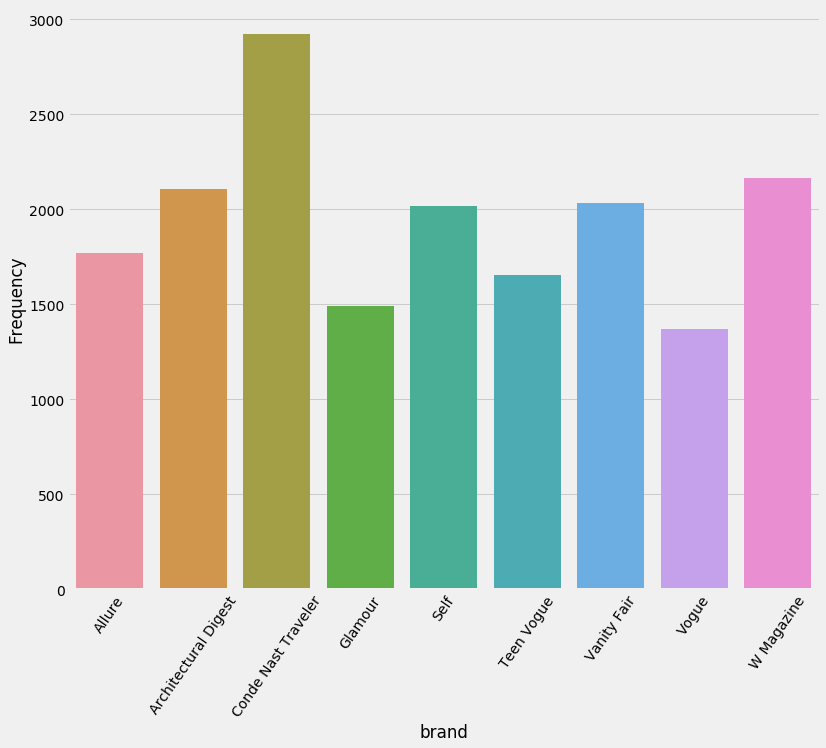

In [65]:
i = sns.countplot(x=IGPics['brand'], data=IGPics, order=['Allure','Architectural_Digest', 'Conde_Naste_Traveler', 'Glamor', 'Self', 'Teen_Vogue', 'Vanity_Fair', 'Vogue', 'W_Magazine'])
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Frequency')
_ = i.set_xticklabels(('Allure', 'Architectural Digest','Conde Nast Traveler', 'Glamour', 'Self', 'Teen Vogue', 'Vanity Fair', 'Vogue', 'W Magazine'))
# _ = plt.title('Brand Frequency Amongst Instagram Pictures')

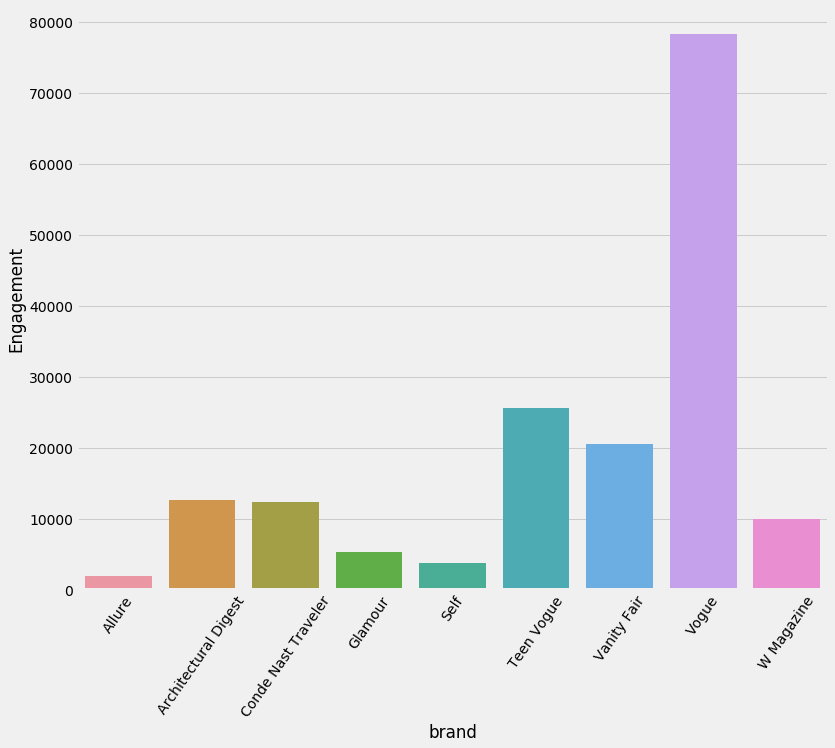

In [66]:
k = sns.barplot(x = IGPics['brand'], y = IGPics['Like_Count'],order=['Allure','Architectural_Digest', 'Conde_Naste_Traveler', 'Glamor', 'Self', 'Teen_Vogue', 'Vanity_Fair', 'Vogue', 'W_Magazine'], ci = None)
# _ = plt.xlabel('Brand')
_ = plt.xticks(rotation = 55)
_ = k.set_xticklabels(('Allure', 'Architectural Digest','Conde Nast Traveler', 'Glamour', 'Self', 'Teen Vogue', 'Vanity Fair', 'Vogue', 'W Magazine'))
_ = plt.ylabel('Engagement')
# _ = plt.title('Mean Brand Engagement Amongst Instagram Pictures')
_ = plt.show()

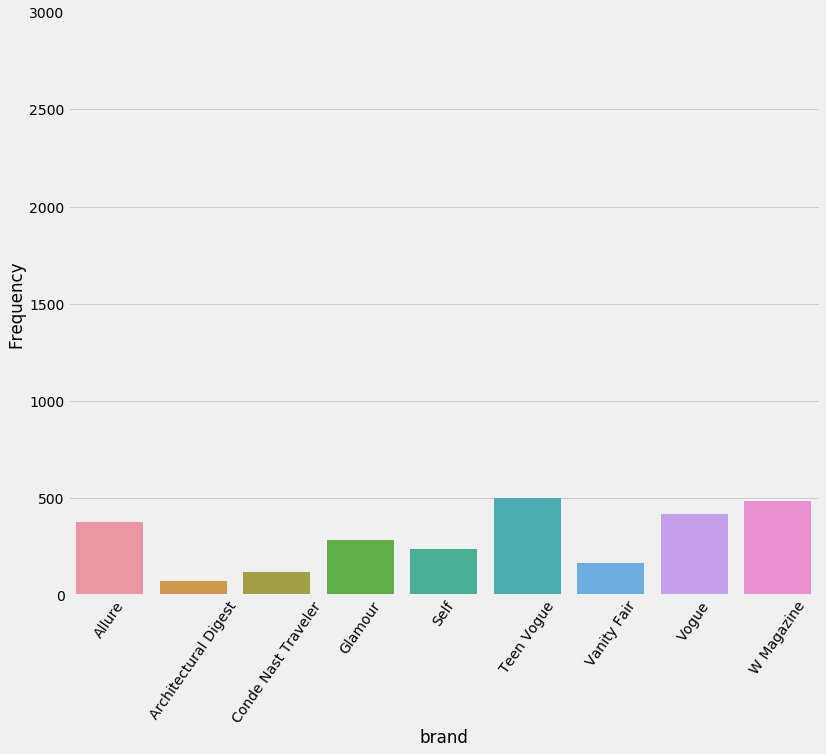

In [67]:
l = sns.countplot(x=IGVids['brand'], data=IGVids, order=['Allure','Architectural_Digest', 'Conde_Naste_Traveler', 'Glamor', 'Self', 'Teen_Vogue', 'Vanity_Fair', 'Vogue', 'W_Magazine'])
_ = plt.xticks(rotation = 55)
_ = l.set_xticklabels(('Allure', 'Architectural Digest','Conde Nast Traveler', 'Glamour', 'Self', 'Teen Vogue', 'Vanity Fair', 'Vogue', 'W Magazine'))
_ = plt.ylabel('Frequency')
# _ = plt.xlabel('Brand')
_ = plt.ylim(0,3000)
# _ = plt.title('Brand Frequency Amongst Instagram Videos')

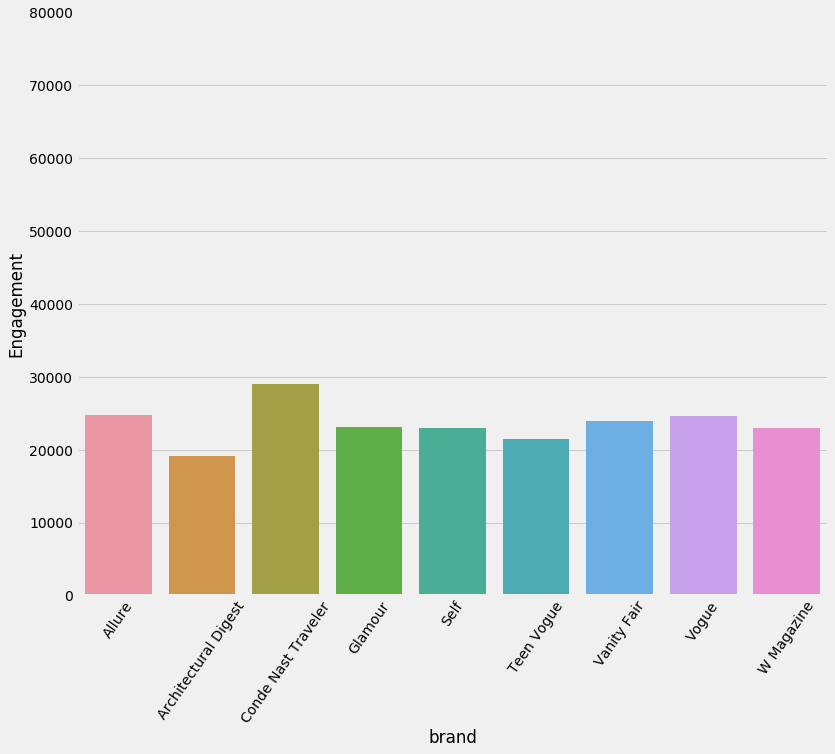

In [68]:
n = sns.barplot(x = IGVids['brand'], y = IGPics['Like_Count'],order=['Allure','Architectural_Digest', 'Conde_Naste_Traveler', 'Glamor', 'Self', 'Teen_Vogue', 'Vanity_Fair', 'Vogue', 'W_Magazine'], ci = None)
# _ = plt.xlabel('Brand')
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Engagement')
_ = n.set_xticklabels(('Allure', 'Architectural Digest','Conde Nast Traveler', 'Glamour', 'Self', 'Teen Vogue', 'Vanity Fair', 'Vogue', 'W Magazine'))
# _ = plt.title('Mean Brand Engagement Amongst Instagram Videos')
_ = plt.ylim(0, 80000)
_ = plt.show()

# Data Export

## Grabbing image/video urls for later analysis

In [49]:
imageurls = []

for i in range(len(picframe['image_url'])):
    imageurls.append(picframe['image_url'][i])

In [50]:
vidurls = []

for i in range(len(vidframe['video_url'])):
    vidurls.append(vidframe['video_url'][i])

In [ ]:
# with open("./assets/InstaPicsImageURLS.csv", "a") as ip:
#     wi = csv.writer(ip, dialect='excel')
#     wi.writerows([x.split(',') for x in imageurls])
#     ip.close()    

In [ ]:
# with open("./assets/InstaVidsVideoURLS.csv", "a") as iv:
#     wv = csv.writer(iv, dialect='excel')
#     wv.writerows([x.split(',') for x in vidurls])
#     iv.close

# Modeling

## CountVectorizer/TF_IDF

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
def doCountVectorizer(data, stream, col, target, stop_wds=1, ngram=(1,1), top=25):
    
    #%% Set up stop word set to add to it if desired
    
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('asdf') # this removes the placeholder for empty posts
    stopwords.append('link')
    stopwords.append('click')
    stopwords.append('http')
    stopwords.append('nast')
    stopwords.append('bio')
    stopwords.append('tap')
    stopwords.append('see')
    stopwords.append('regram')
    stopwords.append('like')
    stopwords.append('com')
    #%% Initialize count vectorizer
    if stop_wds:
        cvt = CountVectorizer(stop_words=stopwords, 
                              strip_accents="unicode",
                              ngram_range=ngram,
                              lowercase=True,
                              max_df=0.95,
                              max_features=5000)
    else:
        cvt = CountVectorizer(strip_accents="unicode",
                              ngram_range=ngram,
                              lowercase=True,
                              max_df=0.95,
                              max_features=5000)
    
    #%% Parse input DataFrame to only feature desired data
    
    # copy portion of DF, to prevent any unwanted edits to main DF
    df = data[data['brand']==stream].copy()
    
    # fill any NAN / NA values with gibberish and add gibberish to stop_words
    df[col].fillna('asdf', inplace=True)
    
    #%% Perform train/test split
    
    X_trn, X_tst, y_trn, y_tst = train_test_split(df[col],df[target],
                                                  test_size=0.3, random_state=6)
    
    #%% Pass training data through vectorizer
    
    fit_data = cvt.fit_transform(X_trn)
    
    # store words and frequencies in arrays, then combine them and make a DF
    allwords = cvt.get_feature_names()
    allfreqs = fit_data.toarray().sum(axis=0)
    
    stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]
    
    streamDF = pd.DataFrame(data=stream_array)
    streamDF.columns = ['phrase', 'frequency']
    
    #%% Return the input number of top phrases
    
    return streamDF.sort_values('frequency', ascending=False)[:top]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
def doTF_IDFVectorizer(data, stream, col, target, stop_wds=1, ngram=(1,1), top=25):
     
    #%% Set up stop word set to add to it if desired
    
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('asdf') # this removes the placeholder for empty posts
    stopwords.append('link')
    stopwords.append('click')
    stopwords.append('http')
    stopwords.append('nast')
    stopwords.append('bio')
    stopwords.append('tap')
    stopwords.append('see')
    stopwords.append('regram')
    stopwords.append('like')
    stopwords.append('com')
    
    #%% Initialize TF-IDF vectorizer
    if stop_wds:
        cvt = TfidfVectorizer(stop_words=stopwords, 
                              strip_accents="unicode",
                              ngram_range=ngram,
                              lowercase=True,
                              max_df=0.95,
                              max_features=5000)
    else:
        cvt = TfidfVectorizer(strip_accents="unicode",
                              ngram_range=ngram,
                              lowercase=True,
                              max_df=0.95,
                              max_features=5000)
    
    #%% Parse input DataFrame to only feature desired data
    
    # copy portion of DF, to prevent any unwanted edits to main DF
    df = data[data['brand']==stream].copy()
    
    # fill any NAN / NA values with gibberish and add gibberish to stop_words
    df[col].fillna('asdf', inplace=True)
    
    #%% Perform train/test split
    
    X_trn, X_tst, y_trn, y_tst = train_test_split(df[col],df[target],
                                                  test_size=0.3, random_state=6)
    
    #%% Pass training data through vectorizer
    
    fit_data = cvt.fit_transform(X_trn)
    
    # store words and frequencies in arrays, then combine them and make a DF
    allwords = cvt.get_feature_names()
    allfreqs = fit_data.toarray().sum(axis=0)
    
    stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]
    
    streamDF = pd.DataFrame(data=stream_array)
    streamDF.columns = ['phrase', 'frequency']
    
    #%% Return the input number of top phrases
    
    return streamDF.sort_values('frequency', ascending=False)[:top]

## CountVect/TF-IDF on Captions for Vogue and Teen Vogue

In [59]:
doCountVectorizer(data = IGPics, stream = 'Vogue', col='Caption', target='impact').head(5)

,phrase,frequency
2566,photographed,700
4711,vogue,461
3996,styled,177
69,2017,173
1360,fashion,152


In [61]:
doTF_IDFVectorizer(data = IGPics, stream = 'Vogue', col='Caption', target='impact').head(5)

,phrase,frequency
2566,photographed,43.103256
4711,vogue,37.929237
3996,styled,22.377227
69,2017,20.696317
1360,fashion,17.976217


In [62]:
doCountVectorizer(data = IGPics, stream = 'Teen_Vogue', col='Caption', target='impact').head(5)

,phrase,frequency
4263,teenvogue,145
1975,happy,143
4394,today,134
4638,us,130
2656,one,124


In [63]:
doTF_IDFVectorizer(data = IGPics, stream = 'Teen_Vogue', col='Caption', target='impact').head(5)

,phrase,frequency
1975,happy,40.563420
555,birthday,34.737974
4394,today,19.167238
2522,mondaymotivation,18.748971
4263,teenvogue,18.492005


## CountVect/TF-IDF on Hashtags for Vogue and Teen Vogue

In [69]:
doCountVectorizer(data = IGPics, stream = 'Vogue', col='Hashtags', target='impact').head(5)

,phrase,frequency
134,vogue125,45
83,metgala,34
8,annieleibovitz,33
59,irvingpenn,26
96,nyfw,21


In [70]:
doTF_IDFVectorizer(data = IGPics, stream = 'Vogue', col='Hashtags', target='impact').head(5)

,phrase,frequency
134,vogue125,31.652161
8,annieleibovitz,26.833843
59,irvingpenn,24.152031
83,metgala,22.720182
103,pfw,20.049104


In [71]:
doCountVectorizer(data = IGPics, stream = 'Teen_Vogue', col='Hashtags', target='impact').head(5)

,phrase,frequency
112,girlgaze,40
223,mondaymotivation,39
316,shinetheory,30
346,tbt,27
253,nyfw,27


In [72]:
doTF_IDFVectorizer(data = IGPics, stream = 'Teen_Vogue', col='Hashtags', target='impact').head(5)

,phrase,frequency
223,mondaymotivation,37.735853
112,girlgaze,27.786470
316,shinetheory,27.304771
253,nyfw,24.078863
346,tbt,22.469447


## CountVectorizer/TF-IDF on Captions for Top 25 and Bottom 25 Instagram Posts

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaTop25['caption'],InstaTop25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = CountVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaTop25['caption'],InstaTop25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = TfidfVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaBot25['caption'],InstaBot25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = CountVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaBot25['caption'],InstaBot25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = TfidfVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

## CountVectorizer/TF-IDF on Hashtags for Top 25 and Bottom 25 Instagram Posts

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaTop25['hashtags'],InstaTop25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = CountVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaTop25['hashtags'],InstaTop25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = TfidfVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaBot25['hashtags'],InstaBot25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = CountVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(InstaBot25['hashtags'],InstaBot25['impact'],
                                                  test_size=0.3, random_state=6)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('asdf') # this removes the placeholder for empty posts
stopwords.append('link')
stopwords.append('click')
stopwords.append('http')
stopwords.append('nast')
stopwords.append('bio')
stopwords.append('tap')
stopwords.append('see')
stopwords.append('regram')
stopwords.append('like')
stopwords.append('com')

cvt = TfidfVectorizer(stop_words=stopwords,
                          strip_accents="unicode",
                          lowercase=True,
                          max_df=0.95,
                          max_features=5000)


fit_data = cvt.fit_transform(X_train)
allwords = cvt.get_feature_names()
allfreqs = fit_data.toarray().sum(axis=0)

stream_array = [[allwords[idx], allfreqs[idx]] for idx in range(len(allwords))]

streamDF = pd.DataFrame(data=stream_array)
streamDF.columns = ['phrase', 'frequency']

streamDF.sort_values('frequency', ascending=False).head(5)